In [2]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03b_wn_620_720',
                          'P_50_T_250',
                          'min_1.e-23_max_1.e-17_ng_10',
                          'wgt_1_1_1_1_1_1_1_1_1_1',
                          'dgs',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'co2',
                               'band03b_wn_620_720',
                               'P_50_T_250',
                               'min_1.e-23_max_1.e-17_ng_10',
                               'wgt_1_1_1_1_1_1_1_1_1_1',
                               'dgs',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7, ]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
fig.display_hrefanchor()

In [11]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [12]:
table_dgdgs.display_hrefanchor()

In [13]:
for g in [1, 2, 3, 4, 5, 6, 7,]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

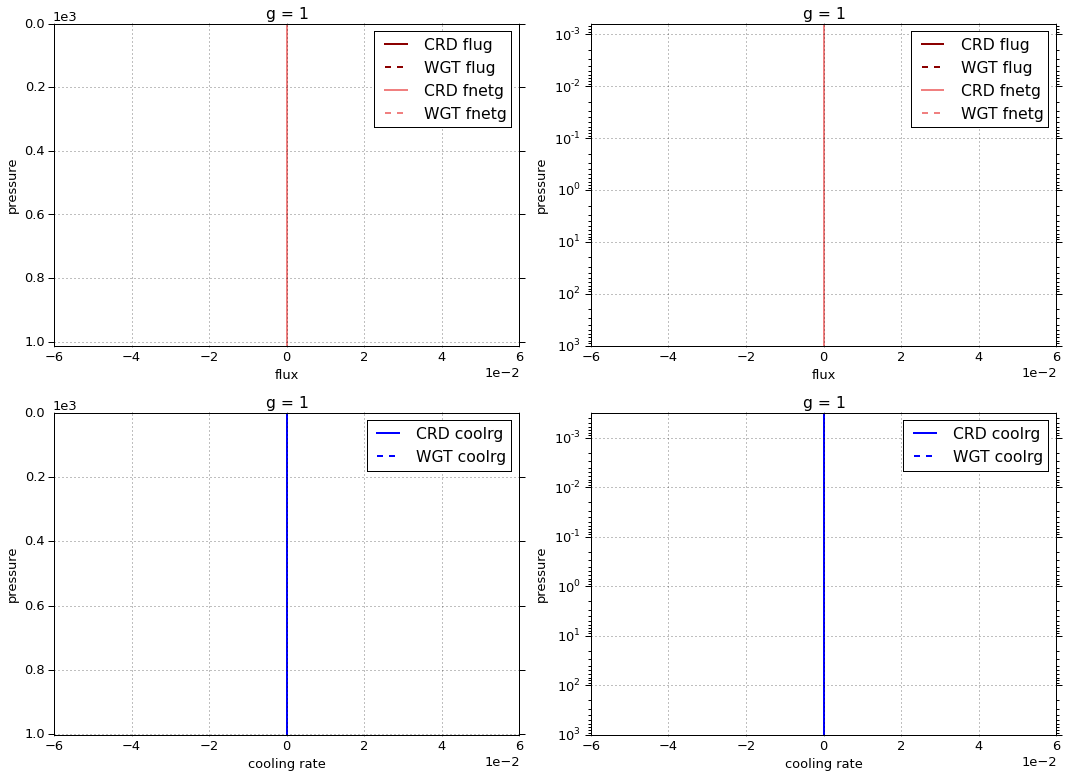

# Figure: flux, cooling rate. g-group 2

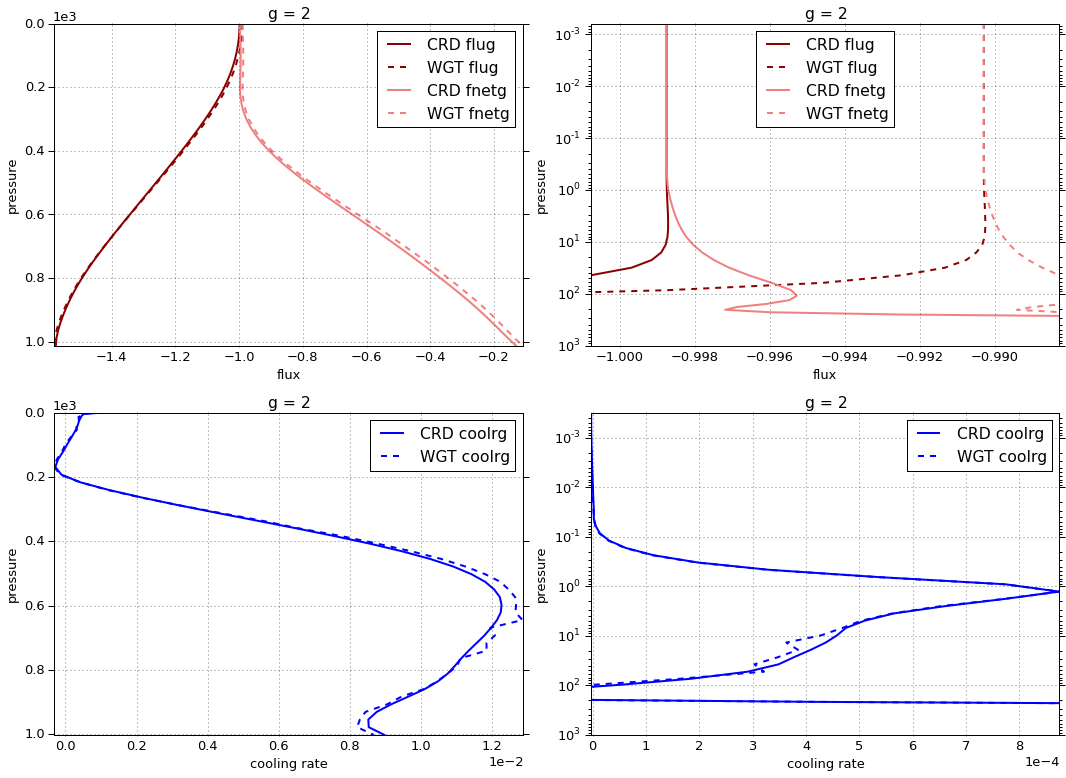

# Figure: flux, cooling rate. g-group 3

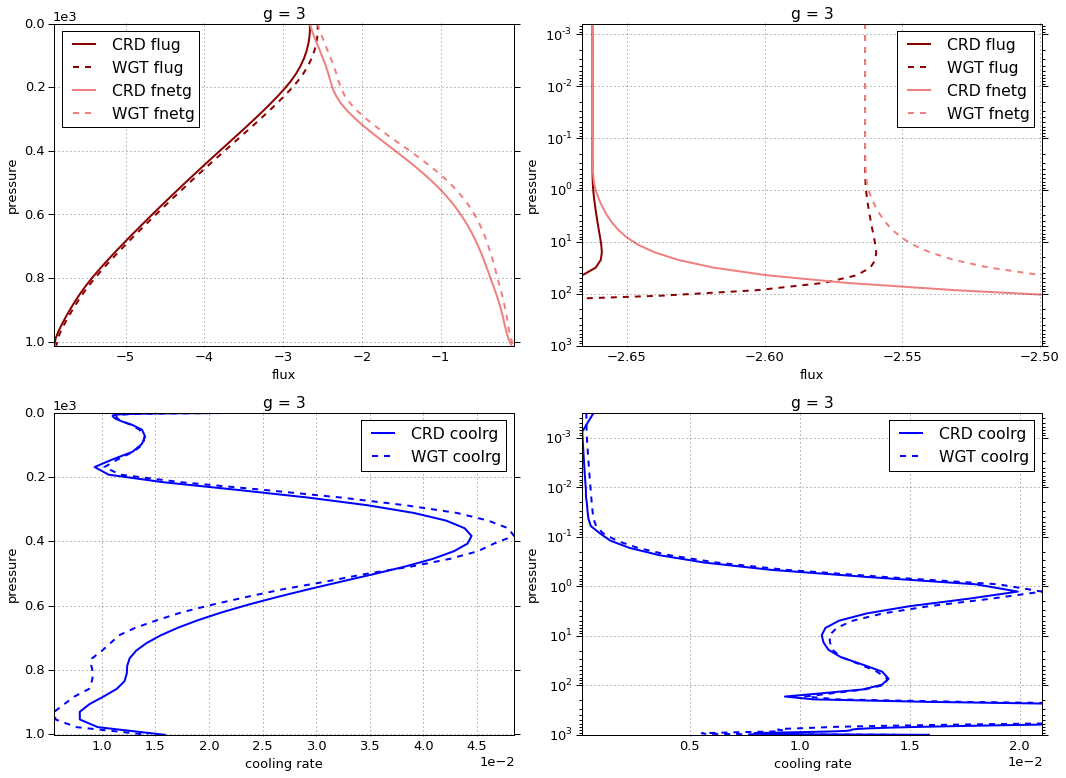

# Figure: flux, cooling rate. g-group 4

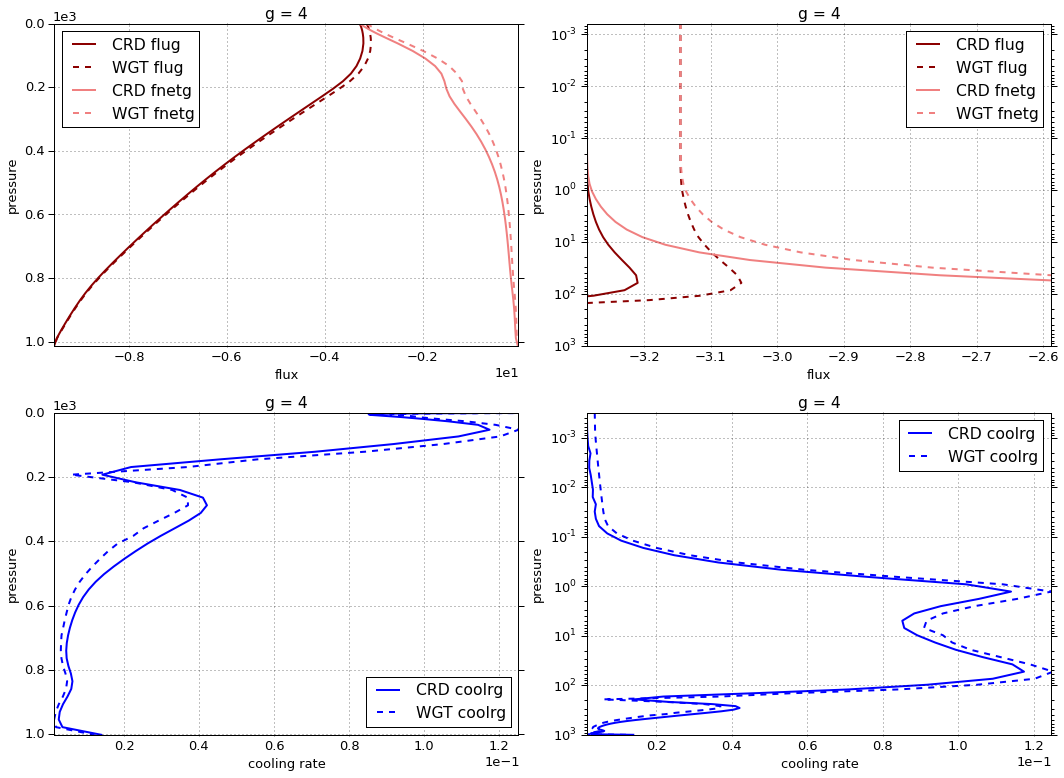

# Figure: flux, cooling rate. g-group 5

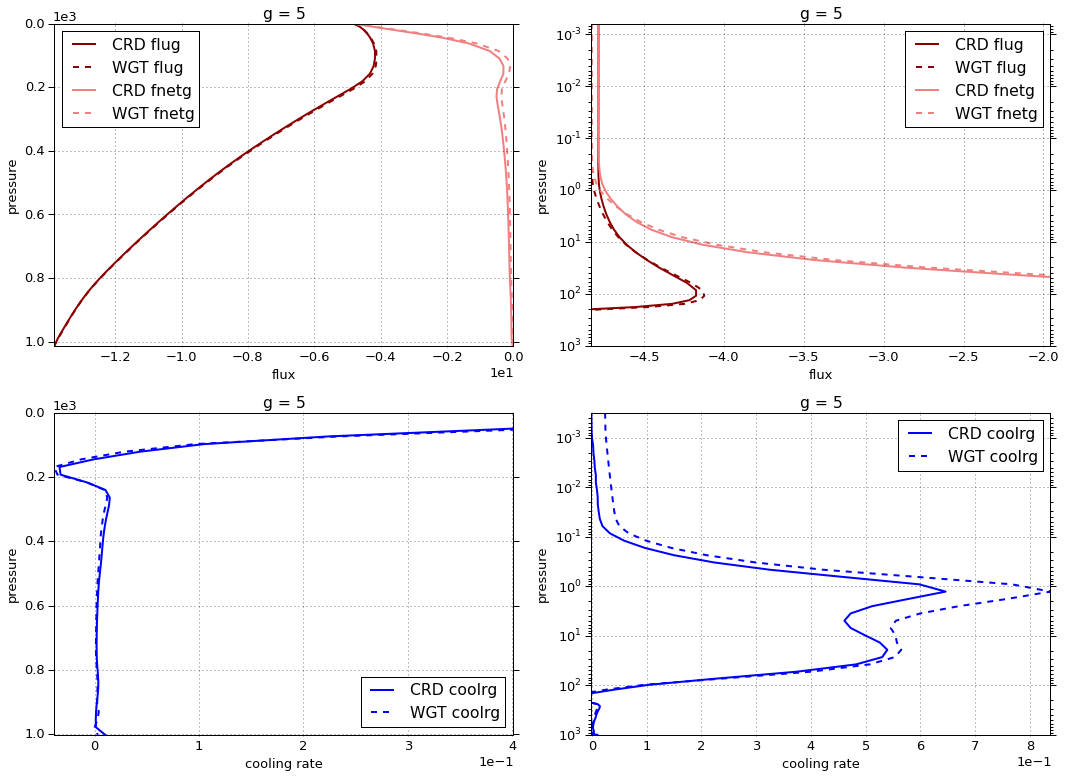

# Figure: flux, cooling rate. g-group 6

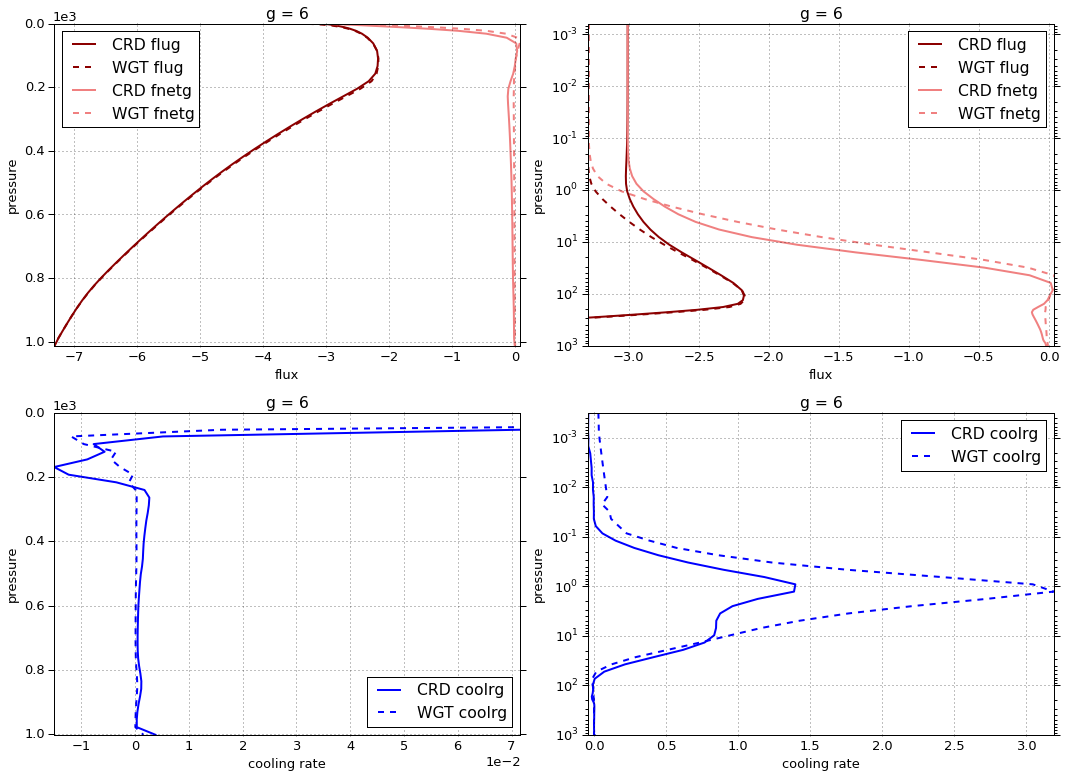

# Figure: flux, cooling rate. g-group 7

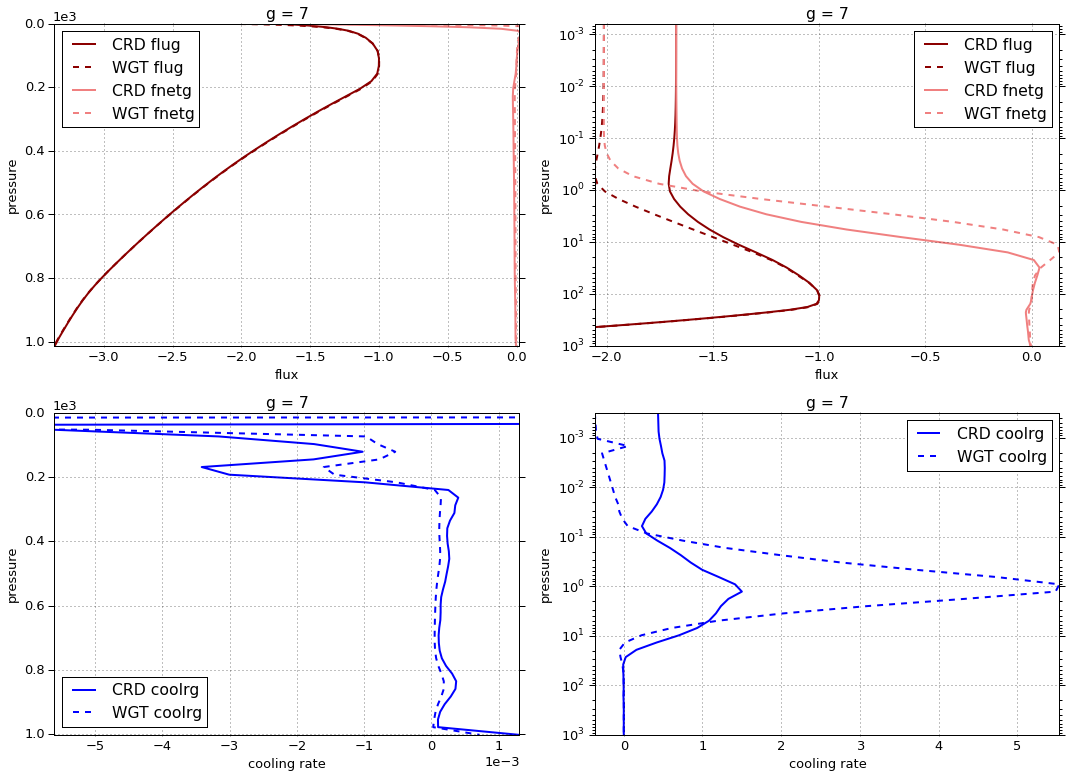

# Figure: flux, cooling rate. g-group total

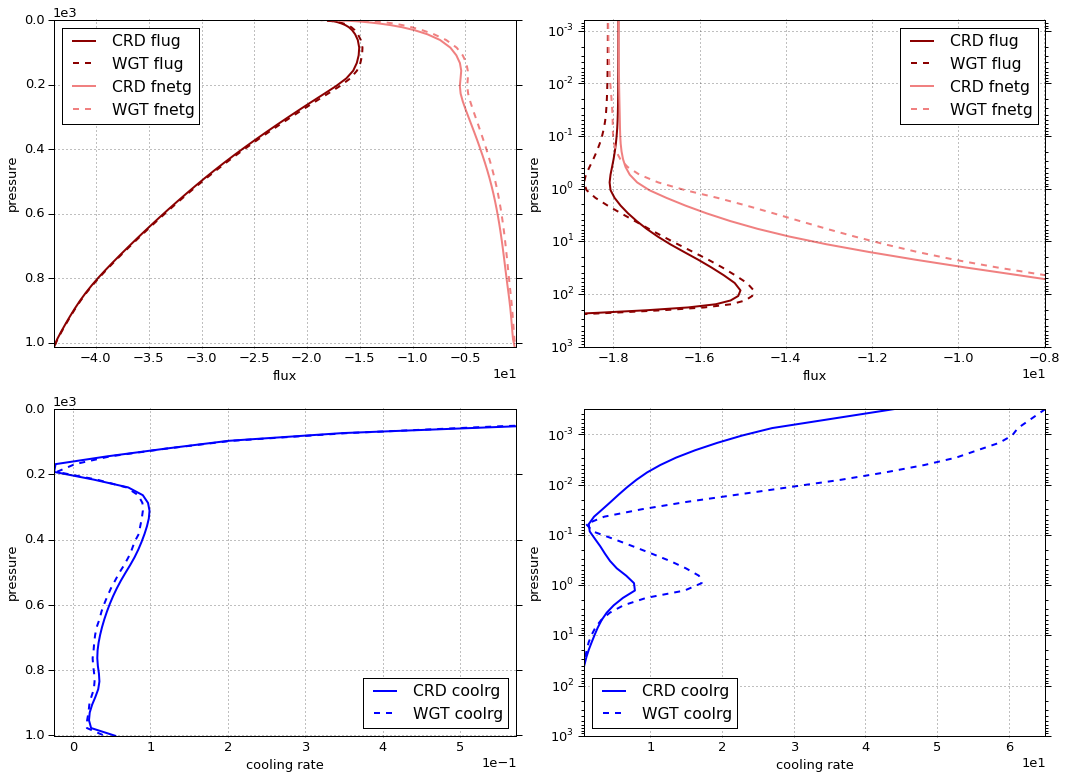

In [14]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg     fnetg
g  pressure level                                
1  0        1       0.000000   0.000000  0.000000
   1013     76      0.000000   0.000000  0.000000
2  0        1      -0.998754   0.000000 -0.998754
   1013     76     -1.575617   1.445525 -0.130091
3  0        1      -2.662499   0.000000 -2.662499
   1013     76     -5.906090   5.809978 -0.096112
4  0        1      -3.286502   0.000000 -3.286502
   1013     76     -9.539171   9.488981 -0.050190
5  0        1      -4.785816   0.000000 -4.785816
   1013     76    -13.830699  13.801046 -0.029653
6  0        1      -3.009516   0.000000 -3.009516
   1013     76     -7.309088   7.298173 -0.010915
7  0        1      -1.673525   0.000000 -1.673525
   1013     76     -3.356340   3.352638 -0.003702
8  0        1      -0.786055   0.000000 -0.786055
   1013     76     -1.367802   1.366784 -0.001018
9  0        1      -0.433171   0.000000 -0.433171
   1013     76     -0.656959   0.656571 -0.000388
10 0        1      -0.249378   0.000000 -0.249378
   1013     76     -0.423081   0.422831 -0.000250


WGT


flug       fldg     fnetg
g  pressure level                                
1  0        1       0.000000   0.000000  0.000000
   1013     76      0.000000   0.000000  0.000000
2  0        1      -0.990300   0.000000 -0.990300
   1013     76     -1.580861   1.470714 -0.110148
3  0        1      -2.563552   0.000000 -2.563552
   1013     76     -5.878677   5.810171 -0.068506
4  0        1      -3.145791   0.000000 -3.145791
   1013     76     -9.538391   9.502197 -0.036194
5  0        1      -4.830061   0.000000 -4.830061
   1013     76    -13.839810  13.831626 -0.008184
6  0        1      -3.289102   0.000000 -3.289102
   1013     76     -7.316440   7.312113 -0.004327
7  0        1      -2.013600   0.000000 -2.013600
   1013     76     -3.361427   3.359439 -0.001988
8  0        1      -0.799604   0.000000 -0.799604
   1013     76     -1.368375   1.367566 -0.000809
9  0        1      -0.373811   0.000000 -0.373811
   1013     76     -0.657682   0.657293 -0.000389
10 0        1      -0.121940   0.000000 -0.121940
   1013     76     -0.423184   0.422933 -0.000250


WGT - CRD


flug      fldg         fnetg
g  pressure level                                  
1  0        1      0.000000  0.000000  0.000000e+00
   1013     76     0.000000  0.000000  0.000000e+00
2  0        1      0.008454  0.000000  8.454400e-03
   1013     76    -0.005245  0.025189  1.994387e-02
3  0        1      0.098948  0.000000  9.894760e-02
   1013     76     0.027413  0.000193  2.760672e-02
4  0        1      0.140711  0.000000  1.407109e-01
   1013     76     0.000780  0.013216  1.399588e-02
5  0        1     -0.044245  0.000000 -4.424550e-02
   1013     76    -0.009111  0.030580  2.146854e-02
6  0        1     -0.279586  0.000000 -2.795864e-01
   1013     76    -0.007352  0.013940  6.588735e-03
7  0        1     -0.340075  0.000000 -3.400751e-01
   1013     76    -0.005087  0.006802  1.714358e-03
8  0        1     -0.013549  0.000000 -1.354901e-02
   1013     76    -0.000573  0.000782  2.091691e-04
9  0        1      0.059360  0.000000  5.936034e-02
   1013     76    -0.000723  0.000722 -1.254520e-06
10 0        1      0.127439  0.000000  1.274385e-01
   1013     76    -0.000103  0.000102 -2.508200e-07

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer           
1  0.000312    1       0.000000
   1001.112500 75      0.000000
2  0.000312    1      -0.000003
   1001.112500 75      0.008970
3  0.000312    1       0.000638
   1001.112500 75      0.015881
4  0.000312    1       0.001745
   1001.112500 75      0.014018
5  0.000312    1      -0.001049
   1001.112500 75      0.010070
6  0.000312    1      -0.039274
   1001.112500 75      0.003812
7  0.000312    1       0.435428
   1001.112500 75      0.001299
8  0.000312    1       3.034110
   1001.112500 75      0.000368
9  0.000312    1       1.607524
   1001.112500 75      0.000140
10 0.000312    1      39.082125
   1001.112500 75      0.000090


WGT


coolrg
g  pressure    layer           
1  0.000312    1       0.000000
   1001.112500 75      0.000000
2  0.000312    1      -0.000003
   1001.112500 75      0.008675
3  0.000312    1       0.000303
   1001.112500 75      0.014337
4  0.000312    1       0.003819
   1001.112500 75      0.012185
5  0.000312    1       0.024007
   1001.112500 75      0.002950
6  0.000312    1       0.030621
   1001.112500 75      0.001559
7  0.000312    1      -0.367544
   1001.112500 75      0.000716
8  0.000312    1      -0.128070
   1001.112500 75      0.000292
9  0.000312    1       0.046249
   1001.112500 75      0.000140
10 0.000312    1      65.501174
   1001.112500 75      0.000090


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      0.000000e+00
   1001.112500 75     0.000000e+00
2  0.000312    1     -4.412621e-07
   1001.112500 75    -2.952549e-04
3  0.000312    1     -3.349338e-04
   1001.112500 75    -1.544489e-03
4  0.000312    1      2.073706e-03
   1001.112500 75    -1.832773e-03
5  0.000312    1      2.505605e-02
   1001.112500 75    -7.120452e-03
6  0.000312    1      6.989475e-02
   1001.112500 75    -2.252930e-03
7  0.000312    1     -8.029722e-01
   1001.112500 75    -5.829401e-04
8  0.000312    1     -3.162180e+00
   1001.112500 75    -7.594969e-05
9  0.000312    1     -1.561275e+00
   1001.112500 75     4.485300e-07
10 0.000312    1      2.641905e+01
   1001.112500 75     8.893400e-08

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-17.885216,0.000000,-17.885216
1013,76,-43.964847,43.642527,-0.322320



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-18.127760,0.000000,-18.127760
1013,76,-43.964847,43.734053,-0.230794



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-2.425442e-01,0.000000,-0.242544
1013,76,5.000000e-08,0.091526,0.091526


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,44.121245
1001.112500,75,0.054649



WGT


,,coolrg
pressure,layer,
0.000312,1,65.110556
1001.112500,75,0.040945



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,20.989312
1001.112500,75,-0.013704


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.00000,0.000000
2,0.03590,0.035957
3,0.13520,0.133713
4,0.21720,0.216955
5,0.31410,0.314793
6,0.16590,0.166416
7,0.07615,0.076457
8,0.03105,0.031124
9,0.01490,0.014959


In [17]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                       wgt                      
              g level flug fldg fnetg   g level flug fldg fnetg
pressure                                                       
0.000000      1     1    0    0     0   1     1    0    0     0
0.000624      1     2    0    0     0   1     2    0    0     0
0.000876      1     3    0    0     0   1     3    0    0     0
0.001229      1     4    0    0     0   1     4    0    0     0
0.001723      1     5    0    0     0   1     5    0    0     0
0.002417      1     6    0    0     0   1     6    0    0     0
0.003391      1     7    0    0     0   1     7    0    0     0
0.004757      1     8    0    0     0   1     8    0    0     0
0.006672      1     9    0    0     0   1     9    0    0     0
0.009359      1    10    0    0     0   1    10    0    0     0
0.013128      1    11    0    0     0   1    11    0    0     0
0.018415      1    12    0    0     0   1    12    0    0     0
0.025830      1    13    0    0     0   1    13    0    0     0
0.036232      1    14    0    0     0   1    14    0    0     0
0.050823      1    15    0    0     0   1    15    0    0     0
0.071291      1    16    0    0     0   1    16    0    0     0
0.100000      1    17    0    0     0   1    17    0    0     0
0.140271      1    18    0    0     0   1    18    0    0     0
0.196760      1    19    0    0     0   1    19    0    0     0
0.275997      1    20    0    0     0   1    20    0    0     0
0.387100      1    21    0    0     0   1    21    0    0     0
0.543100      1    22    0    0     0   1    22    0    0     0
0.761700      1    23    0    0     0   1    23    0    0     0
1.068500      1    24    0    0     0   1    24    0    0     0
1.498800      1    25    0    0     0   1    25    0    0     0
2.102400      1    26    0    0     0   1    26    0    0     0
2.949000      1    27    0    0     0   1    27    0    0     0
4.136600      1    28    0    0     0   1    28    0    0     0
5.802500      1    29    0    0     0   1    29    0    0     0
8.139200      1    30    0    0     0   1    30    0    0     0
...          ..   ...  ...  ...   ...  ..   ...  ...  ...   ...
323.525000    1    47    0    0     0   1    47    0    0     0
347.300000    1    48    0    0     0   1    48    0    0     0
371.075000    1    49    0    0     0   1    49    0    0     0
394.850000    1    50    0    0     0   1    50    0    0     0
418.625000    1    51    0    0     0   1    51    0    0     0
442.400000    1    52    0    0     0   1    52    0    0     0
466.175000    1    53    0    0     0   1    53    0    0     0
489.950000    1    54    0    0     0   1    54    0    0     0
513.725000    1    55    0    0     0   1    55    0    0     0
537.500000    1    56    0    0     0   1    56    0    0     0
561.275000    1    57    0    0     0   1    57    0    0     0
585.050000    1    58    0    0     0   1    58    0    0     0
608.825000    1    59    0    0     0   1    59    0    0     0
632.600000    1    60    0    0     0   1    60    0    0     0
656.375000    1    61    0    0     0   1    61    0    0     0
680.150000    1    62    0    0     0   1    62    0    0     0
703.925000    1    63    0    0     0   1    63    0    0     0
727.700000    1    64    0    0     0   1    64    0    0     0
751.475000    1    65    0    0     0   1    65    0    0     0
775.250000    1    66    0    0     0   1    66    0    0     0
799.025000    1    67    0    0     0   1    67    0    0     0
822.800000    1    68    0    0     0   1    68    0    0     0
846.575000    1    69    0    0     0   1    69    0    0     0
870.350000    1    70    0    0     0   1    70    0    0     0
894.125000    1    71    0    0     0   1    71    0    0     0
917.900000    1    72    0    0     0   1    72    0    0     0
941.675000    1    73    0    0     0   1    73    0    0     0
965.450000    1    74    0    0     0   1    74    0    0     0
989.225000    1    75    0    0     0   1   

In [18]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -0.998754  0.000000e+00 -0.998754   2     1 -0.990300   
0.000624      2     2 -0.998754  1.187052e-09 -0.998754   2     2 -0.990300   
0.000876      2     3 -0.998754  1.673752e-09 -0.998754   2     3 -0.990300   
0.001229      2     4 -0.998754  2.378082e-09 -0.998754   2     4 -0.990300   
0.001723      2     5 -0.998754  3.401937e-09 -0.998754   2     5 -0.990300   
0.002417      2     6 -0.998754  4.890415e-09 -0.998754   2     6 -0.990300   
0.003391      2     7 -0.998754  7.054967e-09 -0.998754   2     7 -0.990300   
0.004757      2     8 -0.998754  1.020356e-08 -0.998754   2     8 -0.990300   
0.006672      2     9 -0.998754  1.478499e-08 -0.998754   2     9 -0.990300   
0.009359      2    10 -0.998754  2.145514e-08 -0.998754   2    10 -0.990300   
0.013128      2    11 -0.998754  3.117369e-08 -0.998754   2    11 -0.990300   
0.018415      2    12 -0.998754  4.534942e-08 -0.998754   2    12 -0.990300   
0.025830      2    13 -0.998754  6.605792e-08 -0.998754   2    13 -0.990300   
0.036232      2    14 -0.998754  9.637862e-08 -0.998754   2    14 -0.990300   
0.050823      2    15 -0.998754  1.412007e-07 -0.998754   2    15 -0.990300   
0.071291      2    16 -0.998754  2.126224e-07 -0.998754   2    16 -0.990300   
0.100000      2    17 -0.998755  3.467468e-07 -0.998754   2    17 -0.990300   
0.140271      2    18 -0.998755  6.276741e-07 -0.998754   2    18 -0.990300   
0.196760      2    19 -0.998755  1.223779e-06 -0.998754   2    19 -0.990300   
0.275997      2    20 -0.998755  2.486390e-06 -0.998753   2    20 -0.990301   
0.387100      2    21 -0.998755  5.154066e-06 -0.998750   2    21 -0.990301   
0.543100      2    22 -0.998755  1.078544e-05 -0.998744   2    22 -0.990300   
0.761700      2    23 -0.998753  2.255966e-05 -0.998730   2    23 -0.990298   
1.068500      2    24 -0.998747  4.533866e-05 -0.998702   2    24 -0.990292   
1.498800      2    25 -0.998738  8.092404e-05 -0.998657   2    25 -0.990283   
2.102400      2    26 -0.998728  1.263965e-04 -0.998602   2    26 -0.990273   
2.949000      2    27 -0.998719  1.833780e-04 -0.998536   2    27 -0.990265   
4.136600      2    28 -0.998714  2.575536e-04 -0.998456   2    28 -0.990260   
5.802500      2    29 -0.998715  3.595186e-04 -0.998356   2    29 -0.990262   
8.139200      2    30 -0.998732  5.078282e-04 -0.998224   2    30 -0.990281   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -1.122823  1.573866e-01 -0.965436   2    47 -1.116439   
347.300000    2    48 -1.140192  1.899110e-01 -0.950281   2    48 -1.134163   
371.075000    2    49 -1.158133  2.261114e-01 -0.932022   2    49 -1.152521   
394.850000    2    50 -1.176541  2.657814e-01 -0.910759   2    50 -1.171252   
418.625000    2    51 -1.195304  3.086342e-01 -0.886670   2    51 -1.190457   
442.400000    2    52 -1.214331  3.543145e-01 -0.860017   2    52 -1.209898   
466.175000    2    53 -1.233560  4.024248e-01 -0.831135   2    53 -1.229554   
489.950000    2    54 -1.252927  4.525253e-01 -0.800401   2    54 -1.249369   
513.725000    2    55 -1.272402  5.041809e-01 -0.768221   2    55 -1.269309   
537.500000    2    56 -1.291932  5.569794e-01 -0.734952   2    56 -1.289309   
561.275000    2    57 -1.311478  6.105112e-01 -0.700966   2    57 -1.309336   
585.050000    2    58 -1.330991  6.644589e-01 -0.666532   2    58 -1.329321   
608.825000    2    59 -1.350410  7.184479e-01 -0.631962   2    59 -1.349283   
632.600000    2    60 -1.369687  7.722334e-01 -0.597454   2    60 -1.369017   
656.375000    2    61 -1.388739  8.254971e-01 -0.563242   2    61 -1.388599   
680.150000    2    62 -1.407501  8.780050e-01 -0.529496   2    62 -1.407887   
703.925000    2    63 -1.425880  9.296044e-01 -0.496275   2   

In [19]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -2.662499  0.000000e+00 -2.662499   3     1 -2.563552   
0.000624      3     2 -2.662499  4.977047e-08 -2.662499   3     2 -2.563552   
0.000876      3     3 -2.662499  7.008555e-08 -2.662499   3     3 -2.563552   
0.001229      3     4 -2.662499  9.921667e-08 -2.662499   3     4 -2.563552   
0.001723      3     5 -2.662500  1.411573e-07 -2.662499   3     5 -2.563552   
0.002417      3     6 -2.662500  2.015434e-07 -2.662499   3     6 -2.563552   
0.003391      3     7 -2.662500  2.885048e-07 -2.662499   3     7 -2.563552   
0.004757      3     8 -2.662500  4.137563e-07 -2.662499   3     8 -2.563552   
0.006672      3     9 -2.662500  5.941776e-07 -2.662499   3     9 -2.563552   
0.009359      3    10 -2.662500  8.541420e-07 -2.662499   3    10 -2.563552   
0.013128      3    11 -2.662500  1.228842e-06 -2.662499   3    11 -2.563552   
0.018415      3    12 -2.662501  1.769186e-06 -2.662499   3    12 -2.563553   
0.025830      3    13 -2.662501  2.548919e-06 -2.662498   3    13 -2.563553   
0.036232      3    14 -2.662502  3.675346e-06 -2.662498   3    14 -2.563553   
0.050823      3    15 -2.662503  5.315021e-06 -2.662497   3    15 -2.563554   
0.071291      3    16 -2.662504  7.840931e-06 -2.662496   3    16 -2.563554   
0.100000      3    17 -2.662505  1.224639e-05 -2.662493   3    17 -2.563555   
0.140271      3    18 -2.662507  2.065890e-05 -2.662486   3    18 -2.563556   
0.196760      3    19 -2.662508  3.705818e-05 -2.662471   3    19 -2.563554   
0.275997      3    20 -2.662506  6.926129e-05 -2.662437   3    20 -2.563548   
0.387100      3    21 -2.662496  1.328952e-04 -2.662363   3    21 -2.563530   
0.543100      3    22 -2.662462  2.595384e-04 -2.662203   3    22 -2.563484   
0.761700      3    23 -2.662374  5.108864e-04 -2.661863   3    23 -2.563376   
1.068500      3    24 -2.662186  9.774073e-04 -2.661209   3    24 -2.563156   
1.498800      3    25 -2.661883  1.689998e-03 -2.660193   3    25 -2.562808   
2.102400      3    26 -2.661522  2.588838e-03 -2.658933   3    26 -2.562394   
2.949000      3    27 -2.661123  3.694284e-03 -2.657428   3    27 -2.561936   
4.136600      3    28 -2.660689  5.095994e-03 -2.655593   3    28 -2.561438   
5.802500      3    29 -2.660224  6.957119e-03 -2.653267   3    29 -2.560899   
8.139200      3    30 -2.659742  9.566662e-03 -2.650176   3    30 -2.560334   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -3.463850  1.494822e+00 -1.969027   3    47 -3.394254   
347.300000    3    48 -3.568560  1.718206e+00 -1.850354   3    48 -3.502264   
371.075000    3    49 -3.674201  1.947391e+00 -1.726810   3    49 -3.610560   
394.850000    3    50 -3.780143  2.178698e+00 -1.601445   3    50 -3.718945   
418.625000    3    51 -3.885774  2.408653e+00 -1.477121   3    51 -3.826843   
442.400000    3    52 -3.990654  2.634279e+00 -1.356375   3    52 -3.933966   
466.175000    3    53 -4.094530  2.853348e+00 -1.241182   3    53 -4.039719   
489.950000    3    54 -4.197338  3.064100e+00 -1.133239   3    54 -4.144148   
513.725000    3    55 -4.299118  3.265485e+00 -1.033634   3    55 -4.247446   
537.500000    3    56 -4.399924  3.457178e+00 -0.942746   3    56 -4.349786   
561.275000    3    57 -4.499778  3.639349e+00 -0.860429   3    57 -4.451016   
585.050000    3    58 -4.598674  3.812436e+00 -0.786238   3    58 -4.551061   
608.825000    3    59 -4.696563  3.976913e+00 -0.719650   3    59 -4.650106   
632.600000    3    60 -4.793385  4.133397e+00 -0.659988   3    60 -4.748105   
656.375000    3    61 -4.889046  4.282603e+00 -0.606443   3    61 -4.844693   
680.150000    3    62 -4.983414  4.425155e+00 -0.558259   3    62 -4.940311   
703.925000    3    63 -5.076282  4.561667e+00 -0.514615   3   

In [20]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -3.286502  0.000000e+00 -3.286502   4     1 -3.145791   
0.000624      4     2 -3.286502  4.261794e-07 -3.286501   4     2 -3.145791   
0.000876      4     3 -3.286502  5.996974e-07 -3.286501   4     3 -3.145791   
0.001229      4     4 -3.286502  8.472105e-07 -3.286501   4     4 -3.145791   
0.001723      4     5 -3.286502  1.201584e-06 -3.286501   4     5 -3.145791   
0.002417      4     6 -3.286503  1.708992e-06 -3.286501   4     6 -3.145791   
0.003391      4     7 -3.286503  2.435692e-06 -3.286501   4     7 -3.145791   
0.004757      4     8 -3.286504  3.476647e-06 -3.286500   4     8 -3.145792   
0.006672      4     9 -3.286505  4.967962e-06 -3.286500   4     9 -3.145792   
0.009359      4    10 -3.286506  7.105130e-06 -3.286499   4    10 -3.145792   
0.013128      4    11 -3.286507  1.016895e-05 -3.286497   4    11 -3.145793   
0.018415      4    12 -3.286510  1.456349e-05 -3.286495   4    12 -3.145794   
0.025830      4    13 -3.286513  2.087107e-05 -3.286492   4    13 -3.145795   
0.036232      4    14 -3.286517  2.993464e-05 -3.286487   4    14 -3.145796   
0.050823      4    15 -3.286523  4.305289e-05 -3.286480   4    15 -3.145798   
0.071291      4    16 -3.286531  6.293573e-05 -3.286468   4    16 -3.145800   
0.100000      4    17 -3.286540  9.620351e-05 -3.286444   4    17 -3.145800   
0.140271      4    18 -3.286548  1.563126e-04 -3.286392   4    18 -3.145794   
0.196760      4    19 -3.286548  2.674214e-04 -3.286280   4    19 -3.145770   
0.275997      4    20 -3.286522  4.748841e-04 -3.286047   4    20 -3.145706   
0.387100      4    21 -3.286432  8.654791e-04 -3.285566   4    21 -3.145554   
0.543100      4    22 -3.286189  1.607598e-03 -3.284582   4    22 -3.145212   
0.761700      4    23 -3.285616  3.016050e-03 -3.282600   4    23 -3.144476   
1.068500      4    24 -3.284430  5.541687e-03 -3.278889   4    24 -3.143041   
1.498800      4    25 -3.282478  9.397759e-03 -3.273080   4    25 -3.140771   
2.102400      4    26 -3.279956  1.441655e-02 -3.265540   4    26 -3.137900   
2.949000      4    27 -3.276852  2.087487e-02 -3.255978   4    27 -3.134442   
4.136600      4    28 -3.273026  2.947561e-02 -3.243550   4    28 -3.130275   
5.802500      4    29 -3.268238  4.149934e-02 -3.226739   4    29 -3.125136   
8.139200      4    30 -3.262139  5.912117e-02 -3.203018   4    30 -3.118690   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -4.968942  3.969135e+00 -0.999807   4    47 -4.890636   
347.300000    4    48 -5.192577  4.297859e+00 -0.894718   4    48 -5.121053   
371.075000    4    49 -5.412812  4.612671e+00 -0.800142   4    49 -5.347571   
394.850000    4    50 -5.628882  4.912765e+00 -0.716116   4    50 -5.569099   
418.625000    4    51 -5.839941  5.197998e+00 -0.641943   4    51 -5.785002   
442.400000    4    52 -6.045403  5.468658e+00 -0.576744   4    52 -5.994702   
466.175000    4    53 -6.245076  5.725094e+00 -0.519983   4    53 -6.198168   
489.950000    4    54 -6.439288  5.968131e+00 -0.471157   4    54 -6.395601   
513.725000    4    55 -6.628676  6.199071e+00 -0.429605   4    55 -6.587724   
537.500000    4    56 -6.813869  6.419543e+00 -0.394325   4    56 -6.775398   
561.275000    4    57 -6.995365  6.631131e+00 -0.364234   4    57 -6.959157   
585.050000    4    58 -7.173494  6.835147e+00 -0.338347   4    58 -7.139560   
608.825000    4    59 -7.348483  7.032690e+00 -0.315793   4    59 -7.316159   
632.600000    4    60 -7.520478  7.224587e+00 -0.295891   4    60 -7.490022   
656.375000    4    61 -7.689593  7.411439e+00 -0.278154   4    61 -7.660448   
680.150000    4    62 -7.855884  7.593709e+00 -0.262176   4    62 -7.828424   
703.925000    4    63 -8.019331  7.771746e+00 -0.247585   4   

In [21]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                       wgt                   \
              g level       flug       fldg     fnetg   g level       flug   
pressure                                                                     
0.000000      5     1  -4.785816   0.000000 -4.785816   5     1  -4.830061   
0.000624      5     2  -4.785819   0.000003 -4.785816   5     2  -4.830062   
0.000876      5     3  -4.785820   0.000005 -4.785816   5     3  -4.830063   
0.001229      5     4  -4.785822   0.000006 -4.785816   5     4  -4.830064   
0.001723      5     5  -4.785825   0.000009 -4.785816   5     5  -4.830065   
0.002417      5     6  -4.785828   0.000013 -4.785815   5     6  -4.830066   
0.003391      5     7  -4.785833   0.000018 -4.785815   5     7  -4.830068   
0.004757      5     8  -4.785840   0.000026 -4.785814   5     8  -4.830071   
0.006672      5     9  -4.785850   0.000037 -4.785812   5     9  -4.830074   
0.009359      5    10  -4.785864   0.000054 -4.785810   5    10  -4.830079   
0.013128      5    11  -4.785883   0.000077 -4.785806   5    11  -4.830086   
0.018415      5    12  -4.785909   0.000110 -4.785799   5    12  -4.830095   
0.025830      5    13  -4.785948   0.000158 -4.785790   5    13  -4.830108   
0.036232      5    14  -4.786001   0.000226 -4.785775   5    14  -4.830125   
0.050823      5    15  -4.786074   0.000324 -4.785750   5    15  -4.830148   
0.071291      5    16  -4.786177   0.000473 -4.785704   5    16  -4.830175   
0.100000      5    17  -4.786314   0.000722 -4.785591   5    17  -4.830197   
0.140271      5    18  -4.786483   0.001172 -4.785311   5    18  -4.830181   
0.196760      5    19  -4.786660   0.001997 -4.784663   5    19  -4.830054   
0.275997      5    20  -4.786769   0.003514 -4.783255   5    20  -4.829661   
0.387100      5    21  -4.786615   0.006305 -4.780310   5    21  -4.828673   
0.543100      5    22  -4.785725   0.011432 -4.774293   5    22  -4.826403   
0.761700      5    23  -4.783087   0.020729 -4.762358   5    23  -4.821350   
1.068500      5    24  -4.777104   0.036476 -4.740628   5    24  -4.811898   
1.498800      5    25  -4.766809   0.059119 -4.707691   5    25  -4.797087   
2.102400      5    26  -4.753320   0.086998 -4.666322   5    26  -4.778773   
2.949000      5    27  -4.736547   0.121570 -4.614977   5    27  -4.756940   
4.136600      5    28  -4.715606   0.167112 -4.548493   5    28  -4.731329   
5.802500      5    29  -4.688935   0.231445 -4.457490   5    29  -4.700387   
8.139200      5    30  -4.654280   0.327627 -4.326652   5    30  -4.661671   
...          ..   ...        ...        ...       ...  ..   ...        ...   
323.525000    5    47  -6.843818   6.473991 -0.369827   5    47  -6.792562   
347.300000    5    48  -7.205574   6.865916 -0.339658   5    48  -7.157929   
371.075000    5    49  -7.557741   7.244694 -0.313047   5    49  -7.513628   
394.850000    5    50  -7.899993   7.610819 -0.289174   5    50  -7.859262   
418.625000    5    51  -8.231599   7.964219 -0.267379   5    51  -8.193927   
442.400000    5    52  -8.551838   8.304515 -0.247324   5    52  -8.517088   
466.175000    5    53  -8.860565   8.631451 -0.229114   5    53  -8.828365   
489.950000    5    54  -9.158458   8.945496 -0.212962   5    54  -9.128662   
513.725000    5    55  -9.447129   9.248005 -0.199123   5    55  -9.419280   
537.500000    5    56  -9.727813   9.540412 -0.187401   5    56  -9.701717   
561.275000    5    57 -10.001614   9.824412 -0.177202   5    57  -9.977057   
585.050000    5    58 -10.269291  10.101140 -0.168150   5    58 -10.246312   
608.825000    5    59 -10.531375  10.371409 -0.159966   5    59 -10.509905   
632.600000    5    60 -10.788399  10.635773 -0.152627   5    60 -10.768234   
656.375000    5    61 -11.040541  10.894500 -0.146040   5    61 -11.021497   
680.150000    5    62 -11.288024  11.148042 -0.139982   5    62 -11.270125   
703.925000    5    63 -11.530980  11.396650 -0.134330   5    63 -11.514305   
727.700000    5    64 -11.769371  

In [22]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      6     1 -3.009516  0.000000 -3.009516   6     1 -3.289102   
0.000624      6     2 -3.009537  0.000018 -3.009519   6     2 -3.289118   
0.000876      6     3 -3.009545  0.000025 -3.009520   6     3 -3.289124   
0.001229      6     4 -3.009557  0.000036 -3.009522   6     4 -3.289133   
0.001723      6     5 -3.009574  0.000050 -3.009524   6     5 -3.289145   
0.002417      6     6 -3.009598  0.000071 -3.009526   6     6 -3.289162   
0.003391      6     7 -3.009630  0.000102 -3.009529   6     7 -3.289185   
0.004757      6     8 -3.009676  0.000145 -3.009531   6     8 -3.289218   
0.006672      6     9 -3.009741  0.000206 -3.009535   6     9 -3.289264   
0.009359      6    10 -3.009831  0.000294 -3.009537   6    10 -3.289327   
0.013128      6    11 -3.009959  0.000419 -3.009540   6    11 -3.289416   
0.018415      6    12 -3.010137  0.000595 -3.009541   6    12 -3.289539   
0.025830      6    13 -3.010389  0.000846 -3.009543   6    13 -3.289750   
0.036232      6    14 -3.010744  0.001201 -3.009544   6    14 -3.289991   
0.050823      6    15 -3.011248  0.001703 -3.009545   6    15 -3.290323   
0.071291      6    16 -3.011960  0.002445 -3.009514   6    16 -3.290716   
0.100000      6    17 -3.012965  0.003651 -3.009314   6    17 -3.291286   
0.140271      6    18 -3.014351  0.005754 -3.008598   6    18 -3.291834   
0.196760      6    19 -3.016176  0.009451 -3.006725   6    19 -3.292320   
0.275997      6    20 -3.018423  0.015891 -3.002532   6    20 -3.292124   
0.387100      6    21 -3.020835  0.026893 -2.993942   6    21 -3.290297   
0.543100      6    22 -3.022531  0.045221 -2.977311   6    22 -3.284079   
0.761700      6    23 -3.021200  0.074519 -2.946681   6    23 -3.268952   
1.068500      6    24 -3.012915  0.117040 -2.895874   6    24 -3.238224   
1.498800      6    25 -2.994351  0.169263 -2.825088   6    25 -3.189694   
2.102400      6    26 -2.968708  0.224933 -2.743775   6    26 -3.131474   
2.949000      6    27 -2.936445  0.289096 -2.647349   6    27 -3.067283   
4.136600      6    28 -2.896650  0.372512 -2.524138   6    28 -2.998042   
5.802500      6    29 -2.847469  0.490898 -2.356572   6    29 -2.922448   
8.139200      6    30 -2.786495  0.664469 -2.122026   6    30 -2.839767   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    6    47 -3.574411  3.478437 -0.095973   6    47 -3.540144   
347.300000    6    48 -3.769867  3.679821 -0.090046   6    48 -3.738218   
371.075000    6    49 -3.959614  3.874958 -0.084656   6    49 -3.930438   
394.850000    6    50 -4.143859  4.064112 -0.079747   6    50 -4.116828   
418.625000    6    51 -4.322103  4.246867 -0.075235   6    51 -4.297133   
442.400000    6    52 -4.494053  4.423110 -0.070943   6    52 -4.470993   
466.175000    6    53 -4.659430  4.592600 -0.066830   6    53 -4.638274   
489.950000    6    54 -4.818941  4.755788 -0.063152   6    54 -4.799334   
513.725000    6    55 -4.973168  4.913058 -0.060110   6    55 -4.954941   
537.500000    6    56 -5.122923  5.065446 -0.057478   6    56 -5.105946   
561.275000    6    57 -5.268834  5.213693 -0.055141   6    57 -5.253032   
585.050000    6    58 -5.411444  5.358352 -0.053091   6    58 -5.396672   
608.825000    6    59 -5.550991  5.499701 -0.051290   6    59 -5.537195   
632.600000    6    60 -5.687702  5.638071 -0.049631   6    60 -5.674831   
656.375000    6    61 -5.821742  5.773654 -0.048088   6    61 -5.809758   
680.150000    6    62 -5.953251  5.906610 -0.046641   6    62 -5.942120   
703.925000    6    63 -6.082315  6.037053 -0.045262   6    63 -6.072017   
727.700000    6    64 -6.208932  6.165031 -0.043902   6    64 -6.199469   
751.475000    6    65 -6.332928  6.290449 -0.042478   6    65 -6.324333   
775.250000    6    66 -6.453739  6.41

In [23]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 7

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      7     1 -1.673525  0.000000 -1.673525   7     1 -2.013600   
0.000624      7     2 -1.673582  0.000088 -1.673493   7     2 -2.013715   
0.000876      7     3 -1.673604  0.000124 -1.673480   7     3 -2.013761   
0.001229      7     4 -1.673635  0.000174 -1.673461   7     4 -2.013825   
0.001723      7     5 -1.673679  0.000246 -1.673433   7     5 -2.013893   
0.002417      7     6 -1.673739  0.000346 -1.673393   7     6 -2.014017   
0.003391      7     7 -1.673821  0.000488 -1.673333   7     7 -2.014191   
0.004757      7     8 -1.673936  0.000687 -1.673249   7     8 -2.014433   
0.006672      7     9 -1.674096  0.000965 -1.673131   7     9 -2.014770   
0.009359      7    10 -1.674319  0.001352 -1.672967   7    10 -2.015240   
0.013128      7    11 -1.674631  0.001887 -1.672744   7    11 -2.015895   
0.018415      7    12 -1.675070  0.002619 -1.672450   7    12 -2.016809   
0.025830      7    13 -1.675694  0.003613 -1.672081   7    13 -2.018072   
0.036232      7    14 -1.676588  0.004945 -1.671643   7    14 -2.019848   
0.050823      7    15 -1.677886  0.006718 -1.671168   7    15 -2.022315   
0.071291      7    16 -1.679745  0.009137 -1.670608   7    16 -2.025780   
0.100000      7    17 -1.682314  0.012679 -1.669636   7    17 -2.030423   
0.140271      7    18 -1.685690  0.018094 -1.667596   7    18 -2.036113   
0.196760      7    19 -1.689942  0.026275 -1.663667   7    19 -2.042835   
0.275997      7    20 -1.695102  0.038250 -1.656852   7    20 -2.049774   
0.387100      7    21 -1.700948  0.055289 -1.645659   7    21 -2.055765   
0.543100      7    22 -1.706492  0.079237 -1.627255   7    22 -2.056406   
0.761700      7    23 -1.708746  0.112772 -1.595974   7    23 -2.044399   
1.068500      7    24 -1.702705  0.158129 -1.544575   7    24 -2.009183   
1.498800      7    25 -1.683167  0.215108 -1.468059   7    25 -1.944344   
2.102400      7    26 -1.654321  0.281337 -1.372984   7    26 -1.864656   
2.949000      7    27 -1.617049  0.367885 -1.249164   7    27 -1.777158   
4.136600      7    28 -1.571196  0.486712 -1.084484   7    28 -1.685797   
5.802500      7    29 -1.516288  0.645629 -0.870659   7    29 -1.593115   
8.139200      7    30 -1.451957  0.839532 -0.612425   7    30 -1.499740   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    7    47 -1.632697  1.609472 -0.023224   7    47 -1.626465   
347.300000    7    48 -1.723337  1.700896 -0.022441   7    48 -1.717467   
371.075000    7    49 -1.811298  1.789527 -0.021771   7    49 -1.805780   
394.850000    7    50 -1.896569  1.875458 -0.021112   7    50 -1.891414   
418.625000    7    51 -1.979037  1.958608 -0.020428   7    51 -1.974253   
442.400000    7    52 -2.058509  2.038814 -0.019695   7    52 -2.054130   
466.175000    7    53 -2.134965  2.116023 -0.018941   7    53 -2.130985   
489.950000    7    54 -2.208574  2.190336 -0.018238   7    54 -2.204981   
513.725000    7    55 -2.279684  2.262085 -0.017599   7    55 -2.276472   
537.500000    7    56 -2.348689  2.331670 -0.017020   7    56 -2.345849   
561.275000    7    57 -2.415939  2.399408 -0.016531   7    57 -2.413426   
585.050000    7    58 -2.481610  2.465493 -0.016117   7    58 -2.479419   
608.825000    7    59 -2.545849  2.530123 -0.015726   7    59 -2.543980   
632.600000    7    60 -2.608749  2.593414 -0.015335   7    60 -2.607215   
656.375000    7    61 -2.670419  2.655462 -0.014957   7    61 -2.669205   
680.150000    7    62 -2.730933  2.716309 -0.014624   7    62 -2.730017   
703.925000    7    63 -2.790314  2.775996 -0.014318   7    63 -2.789696   
727.700000    7    64 -2.848566  2.834563 -0.014003   7    64 -2.848252   
751.475000    7    65 -2.905614  2.891962 -0.013651   7    65 -2.905619   
775.250000    7    66 -2.961218  2.94

In [24]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')